## **Indian Start-up Investment Analysis (2018 - 2021)**

#### **General Objective:**
To assess the investment potential and attractiveness of the Indian startup ecosystem and provide recommendations for optimal course of action

#### **Specific Objectives:**

1. Evaluate the trend in the number of startups securing funding annually to determine the growth pattern within the startup ecosystem over the past four years.

2. Assess the average funding size received by startups each year to understand the financial dynamics and investor confidence levels in the startup landscape from 2018 to 2021.

3. Identify the top investors in the startup scene and analyze their investment distribution across different sectors, focusing specifically on the proportion of investments allocated to the top three funded startups within each sector during the specified period.

#### **Business Questions:**
1.  Analyze the growth trajectory of startups over the past four years from 2018 to 2021. Investigate if there is an increase in the number of startups being funded and the average size companies of funded annually.
2. Investigate the financial landscape for Indian startups over the four years. Has the average funding amount increased, indicating growing investor confidence, or has it plateaued or decreased overtime? 
3. Identify the booming sectors withing the ecosystem and which top city serves as the industrial hub in India.

4. Determine the top investors within the startup ecosystem and identify the proportion of investment by the first 3 investors that have funded different sectors from 2018 - 2021 
5. Explore which stages of startups (e.g., Seed, Series A, Series B) are receiving the majority of investments. What are the predominant stages funded, and which cities are the identified stages of business situated. 


### **Hypothesis to Test:**
 
**Null Hypothesis (H0):**
There is no significant difference in the average funding amounts received across different sectors within the Indian startup ecosystem from 2018 to 2021.

**Alternative Hypothesis (H1):**
There is a significant difference in the average funding amounts received across different sectors within the Indian startup ecosystem from 2018 to 2021.

### Import Packages for Analysis

In [117]:

# import relevant packages
import pyodbc
from dotenv import dotenv_values
import pandas as pd
import warnings
import numpy as np
import io
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')


##### Connect to server for 2020 and 2021 datasets

In [2]:
# load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials from .env file
database=environment_variables.get("DATABASE_NAME")
server=environment_variables.get("SERVER")
login=environment_variables.get("LOGIN")
password=environment_variables.get("PASSWORD")

# create a connection string
connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={login};PWD={password}"

In [3]:
# create connection using the pyodbc method 

connection = pyodbc.connect(connection_string)

#### Select tables of interest from the Database

In [4]:
# selecting tables from Database
db_query = ''' SELECT *
            FROM INFORMATION_SCHEMA.TABLES
            WHERE TABLE_TYPE = 'BASE TABLE' '''

#### View tables of interest from the Database 

In [5]:
# call selected table from SQL Database
ata=pd.read_sql(db_query, connection)

ata

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,dapDB,dbo,LP1_startup_funding2021,BASE TABLE
1,dapDB,dbo,LP1_startup_funding2020,BASE TABLE


#### Preview of Datasets

#### Data_2020

In [6]:
# Call DataFrame to understand DataFrame details for 2020
query= "SELECT * FROM dbo.LP1_startup_funding2020"
data_2020 =pd.read_sql(query, connection)

data_2020.head()



,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


#### Data_2021

In [7]:
# Call DataFrame to understand DataFrame details for 2021.
query= "SELECT * FROM dbo.LP1_startup_funding2021"
data_2021 =pd.read_sql(query, connection)

data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


#### Data_2019 

#### Load csv data from other sources for analysis

In [8]:
# Read 2019 DataFrame to understand data structure.
data_2019=pd.read_csv('startup_funding2019.csv',encoding='latin-1')

data_2019.head(5)

,ï»¿Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


#### Data_2018 

In [9]:
# Fetching 2018 data
url = "https://raw.github.com/Azubi-Africa/Career_Accelerator_LP1-Data_Analysis/master/startup_funding2018.csv"
download = requests.get(url).content
 
 
data_2018 = pd.read_csv(io.StringIO(download.decode('utf-8')))
 
data_2018.head(5)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


#### Print Column Names for Comparison

In [10]:
# Print column names for comparison
print("Column names in data_2018:")
print(data_2018.columns)
print("\n")

# Column names for data_2019
print("Column names in data_2019:")
print(data_2019.columns)
print("\n")

# Column names for data_2020
print("Column names in data_2020:")
print(data_2020.columns)
print("\n")

# Column names for data_2021
print("Column names in data_2021:")
print(data_2021.columns)
print("\n")

Column names in data_2018:
Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')


Column names in data_2019:
Index(['ï»¿Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')


Column names in data_2020:
Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10'],
      dtype='object')


Column names in data_2021:
Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')




Observations
1. **Inconsistency in Column Names**
2018 dataset has different column names compared to the rest of the datasets.

2. **Variations in Column Names**
The same type of information is represented by different column names across years (e.g., 'Company Name', 'Company/Brand', 'Company_Brand').

3. **Unique Columns**
Some years have unique columns not present in other years, which may complicate direct merging.

*This will be addressed by Standardizing column names across all datasets, align similar columns to a standard name for consistency and unique columns based on their importance and relevance will be handled while irrelevant columns will be dropped.*


#### Column renaming for consistency and merging

In [11]:
# Rename columns in each dataset
data_2018.rename(columns={
    'Company Name': 'company_name',
    'Industry': 'sector',
    'Round/Series': 'stage',
    'Amount': 'Amount',
    'Location': 'location',
    'About Company': 'description'
}, inplace=True)

# 2019 column mapping
data_2019.rename(columns={
    'Company/Brand': 'company_name',
    'HeadQuarter': 'location',
    'Sector': 'sector',
    'What it does': 'description',
    'Amount($)': 'Amount'
}, inplace=True)

# 2020 column mapping
data_2020.rename(columns={
    'Company_Brand': 'company_name',
    'What_it_does': 'description',
    'Amount': 'Amount'
}, inplace=True)

# 2021 column mapping
data_2021.rename(columns={
    'Company_Brand': 'company_name',
    'What_it_does': 'description',
    'Amount': 'Amount'
}, inplace=True)

# Merge datasets using the standardized column names
merged_data = pd.concat([data_2018, data_2019, data_2020, data_2021], ignore_index=True)

merged_data.head(5)


,company_name,sector,stage,Amount,location,description,ï»¿Company/Brand,Founded,Founders,Investor,Stage,HeadQuarter,Sector,column10
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Create Year column for time series analysis

In [12]:
# Create a list of years corresponding to each dataset
years = [2018, 2019, 2020, 2021]

# Create a new column 'Year' and assign the respective year to each dataset
merged_data['Year'] = pd.concat([data.assign(Year=year) for data, year in zip([data_2018, data_2019, data_2020, data_2021], years)], ignore_index=True)['Year']

# Now the merged_data DataFrame will have a new column 'Year' with respective years assigned to each dataset


#### Merge columns with same value characteristics and droped the HQ Sector and Stage

In [13]:
# Merge 'location' and 'HeadQuarter' columns into a single 'location' column
merged_data['location'] = merged_data['location'].combine_first(merged_data['HeadQuarter'])

# Merge 'industry' and 'Sector' columns into a single 'industry' column
merged_data['sector'] = merged_data['sector'].combine_first(merged_data['Sector'])

# Merge 'Stage' and 'stage' columns into a single 'stage' column
merged_data['stage'] = merged_data['Stage'].combine_first(merged_data['stage'])

# Drop the original columns
merged_data.drop(columns=['HeadQuarter', 'Sector', 'Stage'], inplace=True)



####  Year column

In [14]:
# Print merge_data for verification
merged_data.head(5)

,company_name,sector,stage,Amount,location,description,ï»¿Company/Brand,Founded,Founders,Investor,column10,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,NaN,NaN,NaN,2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,NaN,NaN,NaN,NaN,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,NaN,NaN,NaN,NaN,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,NaN,NaN,NaN,NaN,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,NaN,NaN,NaN,NaN,2018


In [15]:
# View from the bottom
merged_data.tail(5)

,company_name,sector,stage,Amount,location,description,ï»¿Company/Brand,Founded,Founders,Investor,column10,Year
2874,Gigforce,Staffing & Recruiting,Pre-series A,$3000000,Gurugram,A gig/on-demand staffing company.,NaN,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners,NaN,2021
2875,Vahdam,Food & Beverages,Series D,$20000000,New Delhi,VAHDAM is among the world’s first vertically i...,NaN,2015.0,Bala Sarda,IIFL AMC,NaN,2021
2876,Leap Finance,Financial Services,Series C,$55000000,Bangalore,International education loans for high potenti...,NaN,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures,NaN,2021
2877,CollegeDekho,EdTech,Series B,$26000000,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",NaN,2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital",NaN,2021
2878,WeRize,Financial Services,Series A,$8000000,Bangalore,India’s first socially distributed full stack ...,NaN,2019.0,"Vishal Chopra, Himanshu Gupta","3one4 Capital, Kalaari Capital",NaN,2021


In [16]:
# Check data structure and information
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company_name      2790 non-null   object 
 1   sector            2861 non-null   object 
 2   stage             1941 non-null   object 
 3   Amount            2622 non-null   object 
 4   location          2765 non-null   object 
 5   description       2879 non-null   object 
 6   ï»¿Company/Brand  89 non-null     object 
 7   Founded           2110 non-null   float64
 8   Founders          2334 non-null   object 
 9   Investor          2253 non-null   object 
 10  column10          2 non-null      object 
 11  Year              2879 non-null   int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 270.0+ KB


Observation
Column 10 is virtually empty, indicating irrelevant column for analysis, while the dataset exhibits incorrect data types, requiring rectification for accurate insights.

In [17]:
# Drop Column 10 permanently
merged_data.drop(columns=['column10'], inplace=True)


In [18]:
# Confirm dropped column
merged_data.head()

,company_name,sector,stage,Amount,location,description,ï»¿Company/Brand,Founded,Founders,Investor,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,NaN,NaN,2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,NaN,NaN,NaN,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,NaN,NaN,NaN,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,NaN,NaN,NaN,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,NaN,NaN,NaN,2018


 #### Quality Checks on Columns

   #### sector column

#### Print unique values in column to understand structure

In [19]:
# All unique values were printed to check data structure, anomalites, repeations and errors

# Get all unique values in the 'sector' column along with their indexes
unique_sectors = merged_data['sector'].unique()

print (unique_sectors)

['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing'
 'Agriculture, Farming' 'Credit, Financial Services, Lending, Marketplace'
 'Financial Services, FinTech' 'E-Commerce Platforms, Retail, SaaS'
 'Cloud Infrastructure, PaaS, SaaS' 'Internet, Leisure, Marketplace'
 'Market Research' 'Information Services, Information Technology'
 'Mobile Payments' 'B2B, Shoes' 'Internet'
 'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat'
 'Food Delivery' 'Industrial Automation'
 'Automotive, Search Engine, Service Industry' 'Finance, Internet, Travel'
 'Accounting, Business Information Systems, Business Travel, Finance, SaaS'
 'Artificial Intelligence, Product Search, SaaS, Service Industry, Software'
 'Internet of Things, Waste Management'
 'Air Transportation, Freight Service, Logistics, Marine Transportation'
 'Financial Services' 'Food and Beverage' 'Autonomous Vehicles'
 'Enterprise Software, Health Care, Hospital, Parenting

The sector column had a lot of reapeted sector names with different value characteristcs, hence appearing to be unique, the values were mixed up with upper case values, lower case values, wrong puntuations, spelling errors

In [20]:
# Mapping dictionary for sector cleaning
sector_mapping = {
    'FinTech': ['FinTech', 'fintech', 'Financial Technology', 'Fintech'],
    'EdTech': ['EdTech', 'Edtech', 'Education Technology'],
    'E-commerce': ['E-commerce', 'Ecommerce', 'ecommerce', 'e-commerce'],
    'AI': ['AI', 'Artificial Intelligence', 'artificial intelligence'],
    'Health': ['Health', 'healthcare', 'Health Care', 'healthtech', 'Healthcare'],
    'Food & Beverage': ['Food & Beverage', 'Foodtech', 'Food and Beverages', 'Food Industry', 'Food devlivery', ' Food Delivery' 'Food & tech', 'Foodtech & Logistics', 'Food & Nutrition', 'Food & Bevarages'],
    'Automotive': ['Automotive', 'Automobile', 'Automobiles', 'Automobile Technology', 'automotive tech'],
    'Logistics': ['Logistics', 'logistics', 'Transport & Rentals', 'Transport', 'Logitech', 'Transportation', 'logistics & Supply Chain'],
    'Fashion': ['Fashion', 'Fashion startup', 'Fashion Tech', 'Fashion and lifestyle', 'Fashion & Lifestyle', 'Fashion & Lifestyle', 'Fashion & Lifestyle', 'Fashion & Lifestyle', 'Fashion & Lifestyle', 'FMCG', 'Fashion & Lifestyle', 'Fashion & Lifestyle', 'fashion and lifestyle', 'fashion & lifestyle', 'Fashion & Lifestyle'],
    'CleanTech': ['CleanTech', 'Cleantech', 'Renewables & Environment', 'Clean Energy', 'Pollution control equiptment', 'Renewable player', 'Clean energy', 'Renewable Energy'],
    'Real Estate': ['Real Estate', 'Real estate', 'Commercial Real Estate', 'Housing', 'Housing Marketplace', 'Housing & Rentals', 'housing & Rentals'],
    'Tech': ['Tech', 'technology', 'Technology', 'Techonology', 'Tech company', 'tech startup', 'IT', 'IT company'],
    'SaaS': ['SaaS', 'Saas', 'SaaS startup', 'SaaS platform'],
    'Retail': ['Retail', 'Retail Tech', 'Retail startup', 'Retail Aggregator'],
    'Marketing': ['Marketing', 'marketing', 'Marketing company', 'Marketing & Customer loyalty', 'MarTech'],
    'Blockchain': ['Blockchain', 'Cryptocurrency', 'blockchain'],
    'Social Media': ['Social Media', 'Social network', 'social media', 'Social e-commerce', 'Social Network'],
    'Entertainment': ['Entertainment', 'Digital Entertainment', 'media', 'Media', 'Online Media', 'Media Tech'],
    'Travel': ['Travel', 'TravelTech', 'Tourism', 'Tourism & EV', 'Travel tech'],
    'Finance': ['Finance', 'Financial Services', 'Finance company', 'Financial Technology', 'financial services', 'Financial Exchanges', 'financial technology', 'Venture capitalist', 'Venture capital', 'Venture Capital', 'Capital Markets', 'Investment Management', 'Investment', 'investment', 'Investment Banking', 'investment Management', 'Investment', 'Impact Investing', 'impact investing', 'FinTech & Financial Services', 'FinTech'],
    'E-learning': ['E-learning', 'E-Learning', 'EdtTech', 'EdTech', 'EdTech Startup', 'Education', 'education', 'Higher Education', 'continuing education', 'Education Management', 'Education Technology', 'Educational'],
    'AI & Tech': ['AI & Tech', 'AI and tech'],
    'Security': ['Security', 'Cybersecurity', 'Network Security'],
    'Insurance': ['Insurance', 'Insurance technology', 'insurtech', 'Insurance Tech', 'Health Insurance', 'Life Insurance', 'Property Insurance', 'insurance tech'],
    'HR': ['HR', 'HR Tech', 'HRTech', 'Human Resources', 'hrtech'],
    'Beauty': ['Beauty', 'beauty', 'Beauty & wellness', 'Beauty & Personal Care', 'Beauty & Personal Care'],
    'Agriculture': ['Agriculture', 'AgriTech', 'Agri tech', 'Agri tech', 'Agri tech', 'Agri tech', 'Agriculture Tech', 'AgriTech', 'AgTech', 'Agri tech'],
    'Energy': ['Energy', 'Solar', 'Clean Energy', 'Energy Storage', 'Solar solution', 'Renewable Energy', 'Energy Management', 'Energy', 'Natural Resources', 'electricity', 'Solar Monitoring Company', 'solar', 'Renewable Energy', 'solar'],
    'Mobility': ['Mobility', 'MoEVing', 'Mobility tech', 'Mobility/Transport', 'Mobility & Transport', 'Mobility & Technology', 'Mobility Services', 'Mobility', 'Mobility & EV', 'Mobility & EV', 'Mobility & EV', 'Mobility', 'Mobility', 'Mobility & Tech', 'Mobility'],
    'Manufacturing': ['Manufacturing', 'Manufacturing startup', 'Manufacturing startup', 'manufacturing', 'Manufacturing startup'],
    'D2C': ['D2C', 'D2C Business', 'D2C Fashion', 'D2C jewellery'],
    'Data Science': ['Data Science', 'Data Analytics', 'data science', 'data analytics'],
    'Telecommunications': ['Telecommunications', 'Telecommunication'],
    'Pharmaceutical': ['Pharmaceutical', 'pharmaceutical']
}

# Function to map sector values
def map_sector(sector):
    for key, values in sector_mapping.items():
        if sector in values:
            return key
    return sector  # Return original value if not found

# Apply mapping function to 'sector' column
merged_data['sector'] = merged_data['sector'].apply(map_sector)


#### stage

In [21]:
# Print the unique values in the 'stage' column
unique_stages = merged_data['stage'].unique()
print(unique_stages)

['Seed' 'Series A' 'Angel' 'Series B' 'Pre-Seed' 'Private Equity'
 'Venture - Series Unknown' 'Grant' 'Debt Financing' 'Post-IPO Debt'
 'Series H' 'Series C' 'Series E' 'Corporate Round' 'Undisclosed'
 'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593'
 'Series D' 'Secondary Market' 'Post-IPO Equity' 'Non-equity Assistance'
 'Funding Round' nan 'Fresh funding' 'Pre series A' 'Series G'
 'Post series A' 'Seed funding' 'Seed fund' 'Series F' 'Series B+'
 'Seed round' 'Pre-series A' 'Pre-seed' 'Pre-series' 'Debt' 'Pre-series C'
 'Pre-series B' 'Bridge' 'Series B2' 'Pre- series A' 'Edge' 'Pre-Series B'
 'Seed A' 'Series A-1' 'Seed Funding' 'Pre-seed Round'
 'Seed Round & Series A' 'Pre Series A' 'Pre seed Round' 'Angel Round'
 'Pre series A1' 'Series E2' 'Seed Round' 'Bridge Round' 'Pre seed round'
 'Pre series B' 'Pre series C' 'Seed Investment' 'Series D1' 'Mid series'
 'Series C, D' '$1200000' 'Seed+' 'Series F2' 'Series A+' 'Series

In [22]:
# Define the mapping dictionary
stage_mapping = {
    'Pre-Series A': ['Pre-Series A', 'Pre Series A', 'Pre series A1', 'Series A2'],
    'Pre-Series B': ['Pre-Series B', 'Pre Series B'],
    'Series B': ['Series B', 'Series B3', 'Series B+', 'Series B2', 'Venture - Series Unknown', 'Debt'],
    'Series A': ['Series A+', 'Series A-1', 'Series A', 'Seed Round & Series A', 'Pre-series A1'],
    'Series F': ['Series F', 'Series F2', 'Series F1'],
    'Seed': ['Seed Investment', 'Seed Funding', 'Seed funding', 'Seed+', 'Pre-seed Round'],
    'Series E': ['Series E', 'Series E2'],
    'Pre-Series C': ['Pre-Series C', 'Pre Series C'],
    'Series C' : ['Series C, D'],
    'Series D': ['Series D1']
}

# Invert the mapping dictionary to map individual variations to their standard stage names
inverted_mapping = {v: k for k, values in stage_mapping.items() for v in values}

# Apply the mapping to the 'stage' column permanently
merged_data['stage'] = merged_data['stage'].replace(inverted_mapping)

# Display the updated DataFrame to verify the changes
print(merged_data['stage'].unique())



['Seed' 'Series A' 'Angel' 'Series B' 'Pre-Seed' 'Private Equity' 'Grant'
 'Debt Financing' 'Post-IPO Debt' 'Series H' 'Series C' 'Series E'
 'Corporate Round' 'Undisclosed'
 'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593'
 'Series D' 'Secondary Market' 'Post-IPO Equity' 'Non-equity Assistance'
 'Funding Round' nan 'Fresh funding' 'Pre series A' 'Series G'
 'Post series A' 'Seed fund' 'Series F' 'Seed round' 'Pre-series A'
 'Pre-seed' 'Pre-series' 'Pre-series C' 'Pre-series B' 'Bridge'
 'Pre- series A' 'Edge' 'Pre-Series B' 'Seed A' 'Pre-Series A'
 'Pre seed Round' 'Angel Round' 'Seed Round' 'Bridge Round'
 'Pre seed round' 'Pre series B' 'Pre series C' 'Mid series' '$1200000'
 'PE' '$300000' 'Early seed' '$6000000' '$1000000' 'Seies A' 'Series I']


In [23]:
# Replace specified values with np.nan in the 'stage' column
values_to_replace = [
    'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
    '$1200000',
    'PE',
    'Bridge'
]

# Apply the replacement permanently
merged_data['stage'].replace(values_to_replace, np.nan, inplace=True)



#### Amount Column

In [31]:
# All unique values in amount column was printed to detect characteristics of the values below

# Additional characteristics to count
characteristics = ['—', '\$', '\$Undisclosed', 'Undisclosed', 'None', 'nan', 'Series C', 'Seed', 'Pre-series A', '₹']

# Initialize counts dictionary
counts = {char: 0 for char in characteristics}

# Count occurrences of each characteristic
for characteristic in characteristics:
    if characteristic in {'—', '\$', '\$Undisclosed', 'Undisclosed', 'None', 'nan', 'Series C', 'Seed', 'Pre-series A', '₹'}:
        count = merged_data['Amount'].astype(str).str.contains(characteristic, regex=True, na=False).sum()
    else:
        count = merged_data['Amount'].astype(str).str.contains(f"\\b{characteristic}\\b", regex=True, na=False).sum()
    counts[characteristic] = count

# Count occurrences of numeric values
numeric_count = merged_data['Amount'].notnull().sum()

# Print counts
for characteristic, count in counts.items():
    print(f'{characteristic} - {count}')
print(f'Numeric values - {numeric_count}')




— - 148
\$ - 1289
\$Undisclosed - 73
Undisclosed - 128
None - 3
nan - 259
Series C - 0
Seed - 0
Pre-series A - 0
₹ - 144
Numeric values - 2617


In [32]:
# Specify the stages to search for
stages_to_search = ['Series C', 'Seed', 'Pre-series A']

# Filter the DataFrame for rows containing the specified stages in Amount
filtered_data = merged_data[merged_data['Amount'].isin(stages_to_search)]

# Print column names
print("Index, Funding Amount, Stage")

# Print index, Amount, and corresponding stage side by side
for index, row in filtered_data.iterrows():
    print(f'{index}, {row["Amount"]}, {row["stage"]}')


Index, Funding Amount, Stage


In [33]:
# Specify the stages to search for
stages_to_search = ['Series C', 'Seed', 'Pre-series A']

# Replace values in 'stage' column where 'funding_amount' matches the specified stages
merged_data.loc[merged_data['Amount'].isin(stages_to_search), 'stage'] = merged_data['Amount']

# Replace values in 'Amount' column with NaN where it matches the specified stages
merged_data.loc[merged_data['Amount'].isin(stages_to_search), 'Amount'] = float('nan')


In [34]:
# Specify the indexes to verify
indexes_to_verify = [1912, 1926, 1927, 2215]

# Filter the DataFrame for the specified indexes
filtered_data = merged_data.loc[indexes_to_verify]

# Print index, funding_amount, and stage side by side for verification
print("Index, Funding Amount, Stage")
for index, row in filtered_data.iterrows():
    print(f'{index}, {row["Amount"]}, {row["stage"]}')


Index, Funding Amount, Stage
1912, nan, Series C
1926, nan, Series C
1927, nan, Seed
2215, nan, Pre-series A


#### Currency conversions

Exchage Rate
[Source:OFX](httpshttps://www.ofx.com/en-au/forex-news/historical-exchange-rates/yearly-average-rates/://)

In [35]:

# Provided exchange rates between 2018 - 2021
exchange_rates = {
    2018: 0.014649,
}

# Calculate the average exchange rate
average_exchange_rate = sum(exchange_rates.values()) / len(exchange_rates)

# Print the average exchange rate
print(f'Average exchange rate: {average_exchange_rate:.4f}')



Average exchange rate: 0.0146


In [37]:

# Define the exchange rate
exchange_rate = 0.0146

# Replace '—' in funding_amount with np.nan
merged_data['Amount'].replace('—', np.nan, inplace=True)

# Replace 'None' with np.nan
merged_data['Amount'].replace('None', np.nan, inplace=True)

# Convert Amount to string type
merged_data['Amount'] = merged_data['Amount'].astype(str)

# Remove dollar symbol and commas, then convert to float
merged_data['Amount'] = merged_data['Amount'].str.replace('$', '', regex=False)
merged_data['Amount'] = merged_data['Amount'].str.replace(',', '', regex=False)

# Convert Rupee values to USD and remove the rupee symbol
merged_data['Amount'] = merged_data['Amount'].apply(
    lambda x: float(x.replace('₹', '')) * exchange_rate if isinstance(x, str) and '₹' in x else x
)

# Convert Amount to float type
merged_data['Amount'] = pd.to_numeric(merged_data['Amount'], errors='coerce')



#### Location

In [38]:

# Replace missing values with an empty string as a placeholder
merged_data['location'] = merged_data['location'].fillna('')

# Replace empty strings with the mode (most frequent city)
mode_city = merged_data['location'].mode()[0]
merged_data['location'] = merged_data['location'].replace('', mode_city)

# Extract city names from 'location' column
merged_data['location'] = merged_data['location'].apply(lambda x: x.split(',')[0].strip())


In [39]:
# Renaming some values in the location column
# Define the mapping for name changes
name_changes = {
    'Bangalore': 'Bangalore',
    'Bangalore City': 'Bangalore',
    'Bengaluru': 'Bangalore',
    'Dheli': 'New Delhi',
    'Gurugram\t#REF!' : 'Gurugram',
    'New dheli': 'New Delhi'
}
# Replace the names in the 'location' column
merged_data['location'] = merged_data['location'].replace(name_changes)

In [40]:
unique_locations = merged_data['location'].unique()
print(unique_locations)

['Bangalore' 'Mumbai' 'Gurgaon' 'Noida' 'Hyderabad' 'Kalkaji' 'Delhi'
 'India' 'Hubli' 'New Delhi' 'Chennai' 'Mohali' 'Kolkata' 'Pune' 'Jodhpur'
 'Kanpur' 'Ahmedabad' 'Azadpur' 'Haryana' 'Cochin' 'Faridabad' 'Jaipur'
 'Kota' 'Anand' 'Belgaum' 'Thane' 'Margão' 'Indore' 'Alwar' 'Kannur'
 'Trivandrum' 'Ernakulam' 'Kormangala' 'Uttar Pradesh' 'Andheri'
 'Mylapore' 'Ghaziabad' 'Kochi' 'Powai' 'Guntur' 'Kalpakkam' 'Bhopal'
 'Coimbatore' 'Worli' 'Alleppey' 'Chandigarh' 'Guindy' 'Lucknow'
 'Telangana' 'Gurugram' 'Surat' 'Uttar pradesh' 'Rajasthan' 'Tirunelveli'
 'Singapore' 'Gujarat' 'Kerala' 'Frisco' 'California' 'Dhingsara'
 'New York' 'Patna' 'San Francisco' 'San Ramon' 'Paris' 'Plano' 'Sydney'
 'San Francisco Bay Area' 'Bangaldesh' 'London' 'Milano' 'Palmwoods'
 'France' 'Samastipur' 'Irvine' 'Tumkur' 'Newcastle Upon Tyne' 'Shanghai'
 'Jiaxing' 'Rajastan' 'Ludhiana' 'Dehradun' 'San Franciscao' 'Tangerang'
 'Berlin' 'Seattle' 'Riyadh' 'Seoul' 'Bangkok' 'Warangal' 'Hyderebad'
 'Odisha' 'Biha

#### Investor column

In [41]:
# Print unique values in the 'Investor' column
unique_investors = merged_data['Investor'].unique()
print(unique_investors)

[nan 'Sixth Sense Ventures' 'General Atlantic' ... 'Owl Ventures'
 'Winter Capital, ETS, Man Capital' '3one4 Capital, Kalaari Capital']


In [42]:
# Define the values to drop
values_to_drop = [
    '1000000', '#REF!', '$Undisclosed', '2000000', '$1000000', '$22000000', '$5000000', 'http://100x.vc/'
]

# Replace specified values with NaN in the 'Investor' column
merged_data['Investor'] = merged_data['Investor'].replace(values_to_drop, pd.NA)

In [43]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company_name      2790 non-null   object 
 1   sector            2861 non-null   object 
 2   stage             1934 non-null   object 
 3   Amount            2312 non-null   float64
 4   location          2879 non-null   object 
 5   description       2879 non-null   object 
 6   ï»¿Company/Brand  89 non-null     object 
 7   Founded           2110 non-null   float64
 8   Founders          2334 non-null   object 
 9   Investor          2246 non-null   object 
 10  Year              2879 non-null   int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 247.5+ KB


In [45]:
# Convert 'Amount' dtype to float
merged_data['Amount'] = merged_data['Amount'].astype(float)


In [46]:
# Check for duplicates in merged_data
duplicate_rows = merged_data.duplicated().sum()

# Print the number of duplicate rows
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 23


In [47]:
# Drop duplicate rows from merged_data
merged_data.drop_duplicates(inplace=True)

# Verify if duplicates are dropped
print("Number of duplicate rows after dropping:", merged_data.duplicated().sum())


Number of duplicate rows after dropping: 0


In [48]:
#missing value
merged_data.isna().sum()

company_name          89
sector                18
stage                936
Amount               563
location               0
description            0
ï»¿Company/Brand    2767
Founded              768
Founders             544
Investor             630
Year                   0
dtype: int64

In [49]:
'''Drop column irrelevant to analytical question'''

# Drop the "Founded" and "Founders" columns from merged_data
merged_data.drop(columns=['Founded', 'Founders'], inplace=True)

In [51]:
# Impute missing values in 'sector' with mode
merged_data['sector'].fillna(merged_data['sector'].mode()[0], inplace=True)

# Impute missing values in 'stage' with forward fill
merged_data['stage'].fillna(method='ffill', inplace=True)

# Impute missing values in 'Amount' with median
merged_data['Amount'].fillna(merged_data['Amount'].median(), inplace=True)

# Impute missing values in 'Investor' with mode
merged_data['Investor'].fillna(merged_data['Investor'].mode()[0], inplace=True)


In [52]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 0 to 2878
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company_name      2767 non-null   object 
 1   sector            2856 non-null   object 
 2   stage             2856 non-null   object 
 3   Amount            2856 non-null   float64
 4   location          2856 non-null   object 
 5   description       2856 non-null   object 
 6   ï»¿Company/Brand  89 non-null     object 
 7   Investor          2856 non-null   object 
 8   Year              2856 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 223.1+ KB


In [53]:
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,2856.0,9.848897e+07,3.097961e+09,876.0,1000000.0,3000000.0,8000000.0,1.500000e+11
Year,2856.0,2.020018e+03,1.087759e+00,2018.0,2020.0,2020.0,2021.0,2.021000e+03


### Exploratory Data Analysis

In [54]:
# count the number of startup in each Funding Year
Total_Startups_Funded = merged_data['Year'].value_counts()

Total_Startups_Funded

Year
2021    1190
2020    1052
2018     525
2019      89
Name: count, dtype: int64

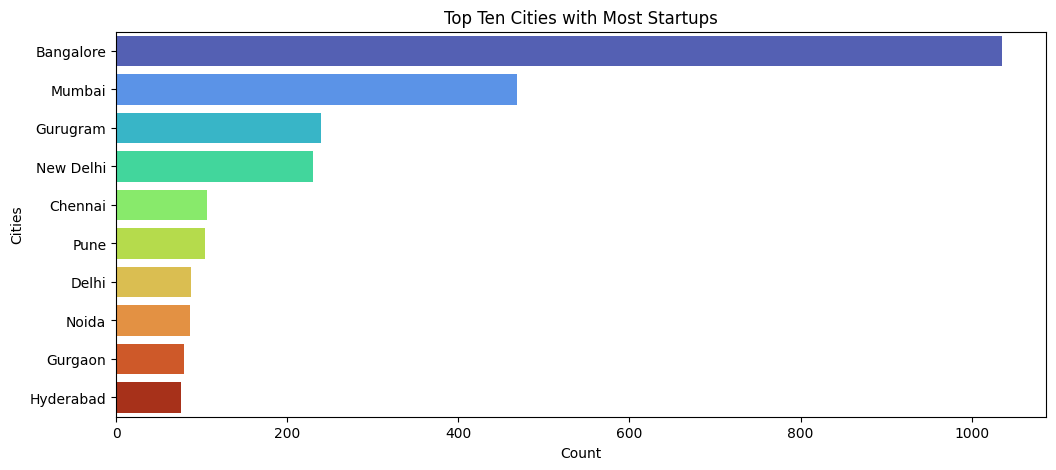

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# count the number of startups in each city
top_ten_loc = merged_data['location'].value_counts().head(10)

# plot a horizontal bar chart to show the number of startups in each city
plt.figure(figsize=(12, 5))
sns.barplot(x=top_ten_loc.values, y=top_ten_loc.index,palette='turbo')
plt.title('Top Ten Cities with Most Startups')
plt.xlabel('Count')
plt.ylabel('Cities')
plt.show()

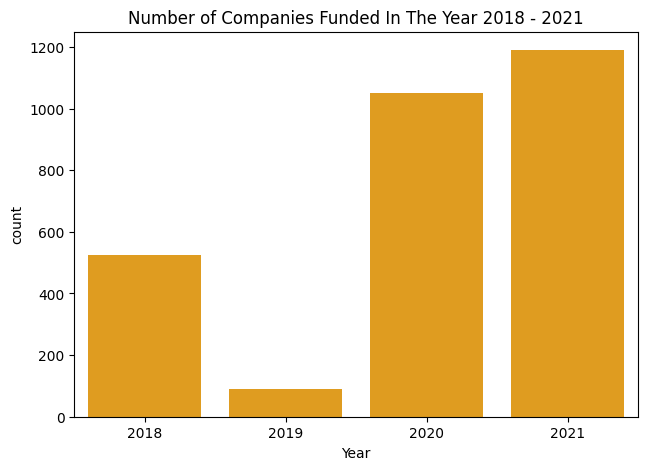

In [81]:

# plot a line gragh to show the trend of startup with the period 2018 - 2021

base_color = 'orange'
# plot a bar chart to show the number of startups within each year
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 2)
sns.countplot(
    x='Year',  
    data=merged_data, 
    color=base_color)

plt.title('Number of Companies Funded In The Year 2018 - 2021')
plt.show()

Text(0.5, 1.0, 'Trend of Startups over the period')

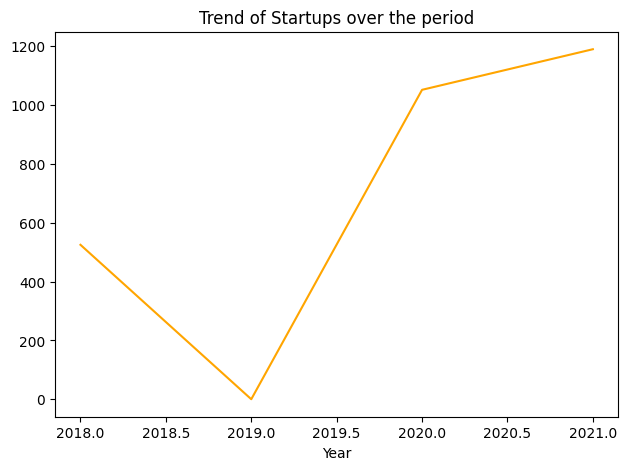

In [82]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
funding_year_count = merged_data.groupby(['Year'])['company_name'].count()
funding_year_count.plot(color='#FFA500');
plt.title('Trend of Startups over the period')

Text(0.5, 1.0, 'Average Funding Per Year')

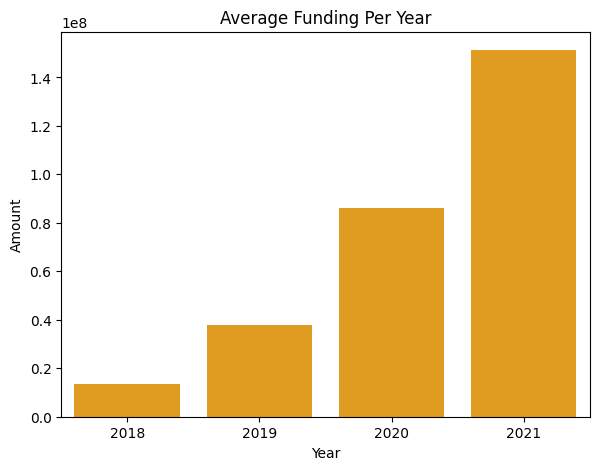

In [85]:
# get the average(mean) funding yearly
average_funding_year= merged_data.groupby(['Year']).agg({'Amount': 'mean'})
average_funding_year.reset_index(inplace=True)

# print the average funding yearly
# plot a bar chart to show the avearge funding yearly
plt.figure(figsize=(15,  5))
plt.subplot(1, 2, 1)
sns.barplot(
    data=average_funding_year,
    x='Year',
    y='Amount',
    color=base_color)
plt.title('Average Funding Per Year')

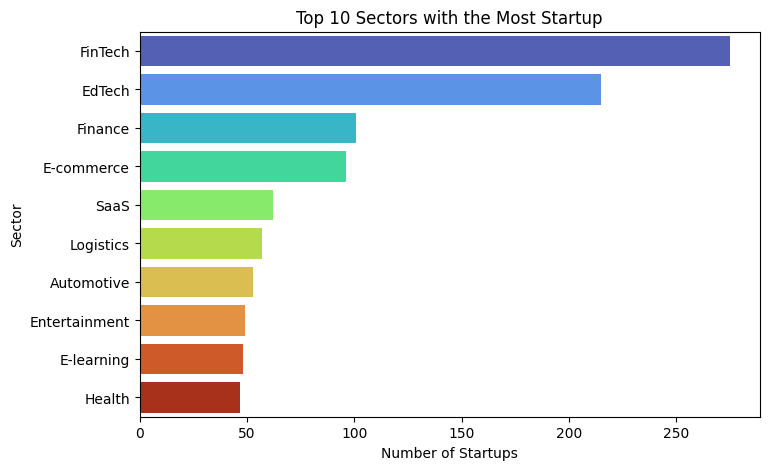

In [88]:
# check the top 10 cities with the most startups
Top_ten_sectors = merged_data['sector'].value_counts().head(10)

# plot a bar chart to show the top 10 sectors with the most number of startups
plt.figure(figsize=(8, 5))
sns.set_palette("turbo")  # Set the turbo palette
sns.barplot(x=Top_ten_sectors.values, y=Top_ten_sectors.index, palette='turbo')
plt.title('Top 10 Sectors with the Most Startup')
plt.xlabel('Number of Startups')
plt.ylabel('Sector')
plt.show()

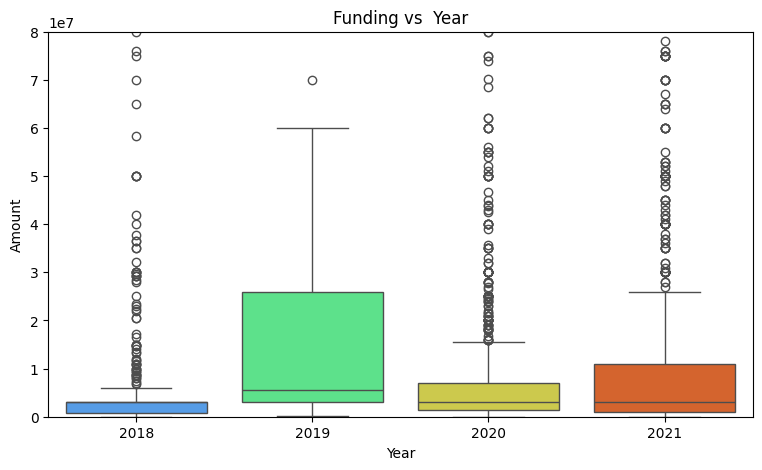

In [100]:

# plot a box plot to show the avearge funding yearly
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 2)
sns.boxplot(data=merged_data, y='Amount', x='Year', palette='turbo')
plt.title('Funding vs  Year')
plt.ylim(-10,80000000)
plt.show()

### Hypothesis Testing 

**Null Hypothesis (H0):**
The funding amounts received by various sectors in the Indian startup ecosystem did not show any significant variation from 2018 to 2021.

**Alternative Hypothesis (H1):**
The funding amounts received by various sectors in the Indian startup ecosystem showed significant variation from 2018 to 2021.

In [102]:
import scipy.stats as stats

# Extract funding amounts for each sector
sector_funding = [merged_data[merged_data['sector'] == sector]['Amount'] for sector in merged_data['sector'].unique()]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*sector_funding)

alpha = 0.05

# Print the results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Check for significance
if p_value < alpha:
    print("Reject Null Hypothesis. There is a significant difference in average funding amounts across sectors.")
else:
    print("Fail to reject Null Hypothesis. There is no significant difference in average funding amounts across sectors.")


F-Statistic: 0.022617019586451906
P-Value: 0.9999999999999999
Fail to reject Null Hypothesis. There is no significant difference in average funding amounts across sectors.


#### Answering the Business Questions 

 *Analyze startup growth and funding trends.*

Text(0.5, 1.0, 'Trend of Startups ')

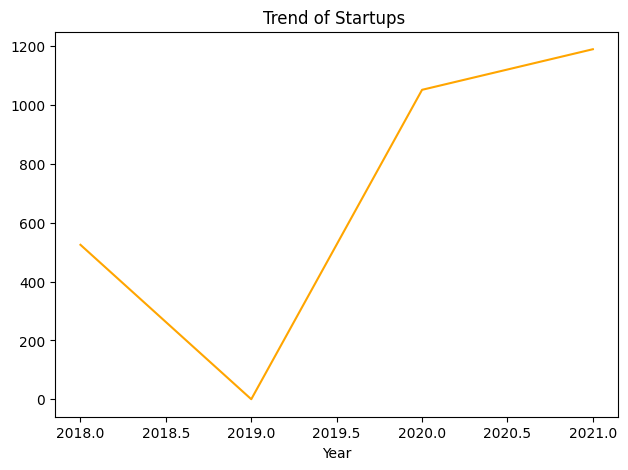

In [106]:



plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
funding_year_count = merged_data.groupby(['Year'])['company_name'].count()
funding_year_count.plot(color='#FFA500');
plt.title('Trend of Startups ')



In [107]:
# count the number of startup in each Funding Year
merged_data['Year'].value_counts()


Year
2021    1190
2020    1052
2018     525
2019      89
Name: count, dtype: int64

Summary 

From 2018 to 2021, we've seen a significant rise in the number of startups getting funded. However, there was a dip in 2019, with only 89 startups receiving funding, likely due to the economic uncertainty caused by the COVID-19 pandemic. Despite this, the trend after 2019 shows a promising economic rebound, indicating resilience and growth potential in the startup ecosystem.

*Examine the financial trends of Indian startups over four years, focusing on changes in average funding amounts and investor confidence* 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


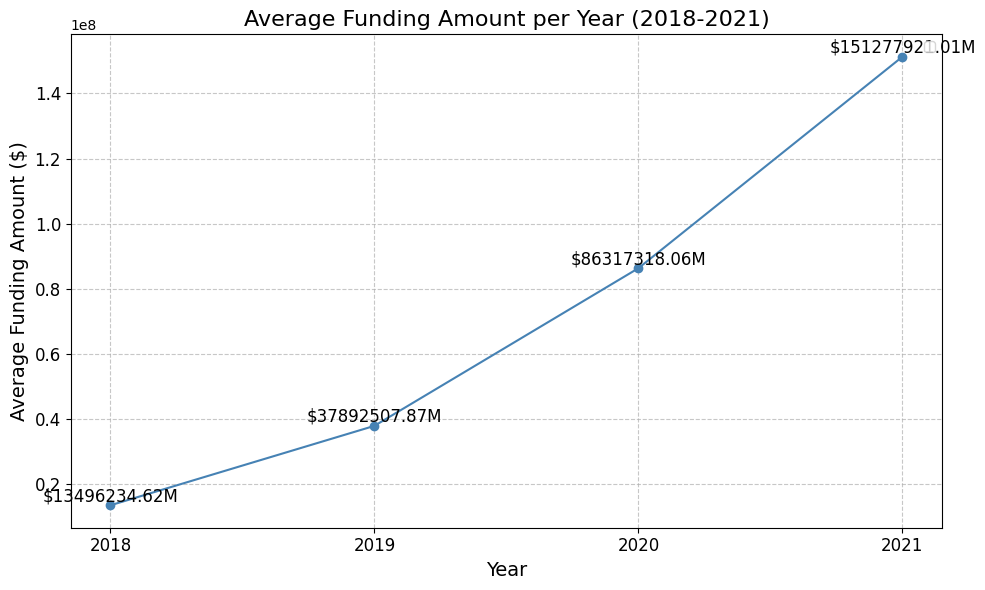

In [115]:
from scipy.stats import linregress
# Filter data for the years 2018 to 2021
filtered_data = merged_data[(merged_data['Year'] >= 2018) & (merged_data['Year'] <= 2021)]

# Group data by year and calculate the average funding amount for each year
average_funding_per_year = filtered_data.groupby('Year')['Amount'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(average_funding_per_year.index, average_funding_per_year.values, color='steelblue', marker='o')

# Add labels and title
plt.title('Average Funding Amount per Year (2018-2021)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Funding Amount ($)', fontsize=14)
plt.xticks(average_funding_per_year.index, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Add values on top of each point with a slight offset for better visibility
for i, height in enumerate(average_funding_per_year.values):
    plt.text(average_funding_per_year.index[i], height + 0.5, "${:.2f}M".format(height), ha='center', va='bottom', fontsize=12)

# Add legend
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# count the number of startup in each Funding Year
Total_Startups_Funded = merged_data['Year'].value_counts()

Total_Startups_Funded

Year
2021    1190
2020    1052
2018     525
2019      89
Name: count, dtype: int64

Observation

Over the four-year period from 2018 to 2021, Indian startup financial landscape experienced significant growth, with average funding amounts increasing dramatically. From $13.4 million in 2018 to $151.3 million in 2021, this suggests increasing investor confidence and a more mature startup ecosystem.

3. *Identify the booming locations withing the ecosystem and which top city serves as the industrial hub in India.*

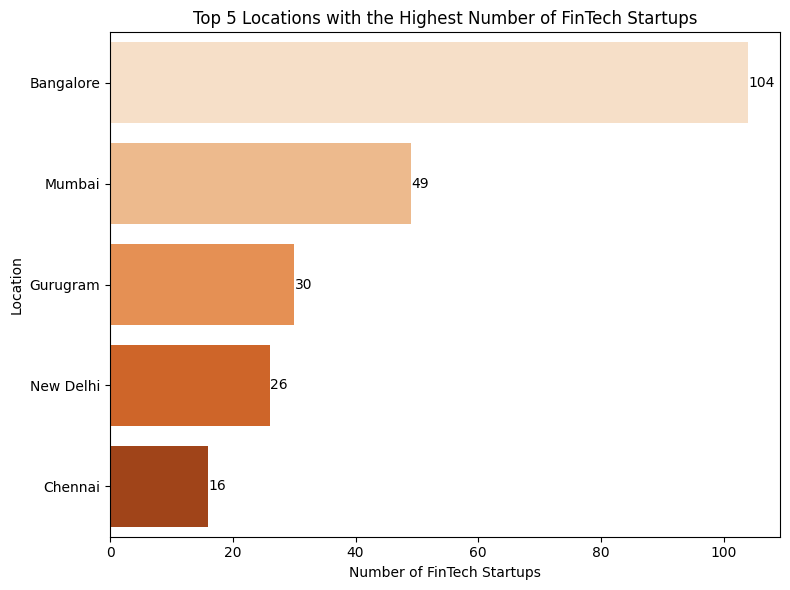

In [134]:
# Assuming you have a DataFrame named 'merged_data' with columns 'sector' and 'location'

# Filter data to include only startups in the FinTech sector
fintech_data = merged_data[merged_data['sector'] == 'FinTech']

# Group data by location (city) and count the number of FinTech startups in each location
fintech_startup_count_per_location = fintech_data['location'].value_counts()

# Select the top 5 locations with the highest number of FinTech startups
top_5_locations = fintech_startup_count_per_location.head(5)

# Plotting the top 5 locations with the highest number of FinTech startups
plt.figure(figsize=(8, 6))
sns.barplot(x=top_5_locations.values, y=top_5_locations.index, palette='Oranges')

# Annotate the bars with count numbers
for i, count in enumerate(top_5_locations.values):
    plt.text(count + 0.1, i, str(count), ha='left', va='center')

plt.title('Top 5 Locations with the Highest Number of FinTech Startups')
plt.xlabel('Number of FinTech Startups')
plt.ylabel('Location')
# plt.invert_yaxis()  # Invert y-axis to display the highest count at the top

plt.tight_layout()
plt.show()


Observation

The findings reveal that the top locations with the highest startups Bangalore emerges as the industrial hub in India, boasting the highest number of FinTech startups among the top cities, followed by Mumbai, Gurugram, New Delhi, and Chennai.


4. *Determine the top investors within the startup ecosystem and identify the proportion of investment by the first 3 investors that have funded different sectors from 2018 - 2021* 

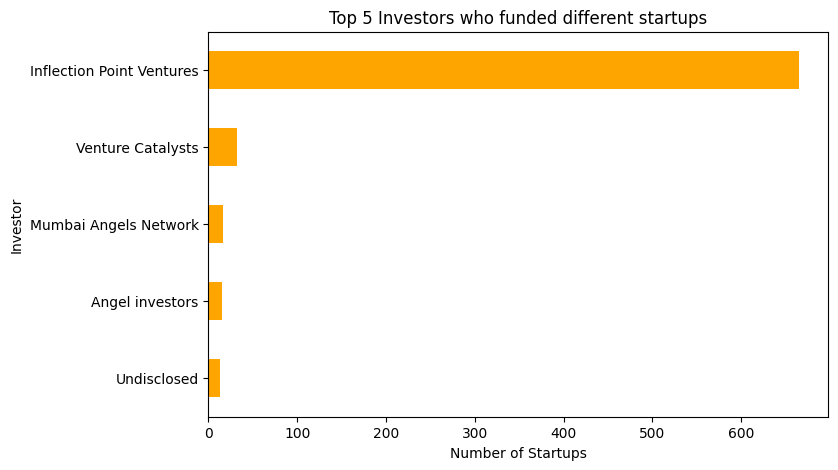

In [136]:
Top_10_investors_ = merged_data['Investor'].value_counts().head(5)

# plot a bar chart to show the top 5 investors with the most number of startups
plt.figure(figsize=(8, 5))
Top_10_investors_.sort_values().plot(kind='barh', color='orange')
plt.title('Top 5 Investors who funded different startups')
plt.xlabel('Number of Startups')
plt.ylabel('Investor');

Observtion

The analysis identifies Inflection Point Ventures, Venture Catalysts, and Mumbai Angels Network as the top investors within the Indian startup ecosystem. These key players have funded multiple startups across diverse sectors from 2018 to 2021. Inflection Point Ventures stands out with the highest proportion of investment, followed by Venture Catalysts and Mumbai Angels Network. Their diverse investment portfolios reflect a strategic approach to spreading risk and capitalizing on opportunities across various sectors, contributing to the growth and innovation of the startup ecosystem

5. *Explore which stages of startups (e.g., Seed, Series A, Series B) are receiving the majority of investments. What are the predominant stages funded, and which cities are the identified stages of business situated.*

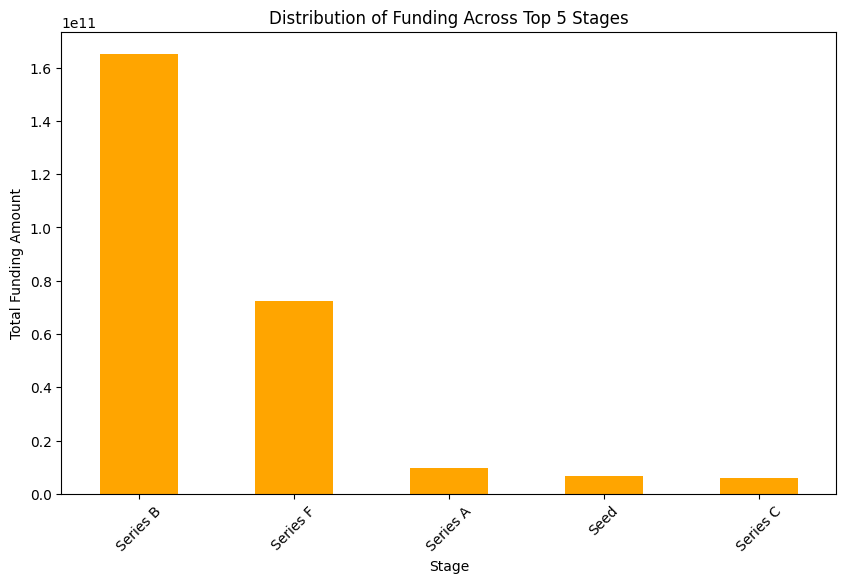

In [138]:
# Group data by stage and calculate the sum of funding amount for each stage
stage_funding = merged_data.groupby('stage')['Amount'].sum()

# Select the top 5 stages with the highest total funding amounts
top_5_stages = stage_funding.nlargest(5)

# Plotting
plt.figure(figsize=(10, 6))
top_5_stages.plot(kind='bar', color='orange')
plt.title('Distribution of Funding Across Top 5 Stages')
plt.xlabel('Stage')
plt.ylabel('Total Funding Amount')
plt.xticks(rotation=45)
plt.show()

Observation

The top investors in the Indian startup ecosystem have shown a preference for funding businesses at various stages, with a notable focus on Series B investments. Series B funding is favored due to reduced risk and significant growth potential, as startups at this stage have typically proven their business model and are ready to scale. Bangalore emerges as the primary location for Series B startups.

#### **Recommendation**

Here are some recommendations for the team to consider, based on the observations of the Indian startup ecosystem:

1. **Maintain Flexibility and Adaptability**: The Indian startup ecosystem has demonstrated resilience and growth potential, even in the face of challenges such as the economic uncertainty associated with the COVID-19 pandemic. The team should be prepared to navigate uncertainties and adapt strategies as needed.
2. **Prioritize High-Growth Sectors**: The booming sectors within the Indian startup ecosystem, such as FinTech, EdTech, Finance, E-Commerce, and SaaS, offer lucrative opportunities for investment and innovation. The team should consider these sectors to capitalize on the growing demand and investor interest.
3. **Develop a Location Strategy**: Bangalore has emerged as the industrial hub in India, with a high concentration of startups, particularly in the FinTech sector. The team should consider establishing a presence in Bangalore to tap into the vibrant startup ecosystem and access talent, resources, and networking opportunities.
4. **Form Strategic Partnerships with Top Investors**: The team is encouraged to form strategic partnerships with top investors such as Inflection Point Ventures, Venture Catalysts, and Mumbai Angels Network. These investors have a proven track record of funding successful startups across diverse sectors and can provide valuable insights, mentorship, and funding opportunities.
5. **Focus on Series B Investments**: Given the preference of top investors for Series B investments, the team should consider targeting startups at this stage for investment or partnership opportunities. Series B startups have typically proven their business model and are ready to scale, offering lower risk and significant growth potential.